<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/GERDAU_Aula_08_Sklearn_Modelo_N%C3%A3o_supervisionado_MeanShift.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GERDAU - Treinamento InCompany
# Autor:  Profº - Ricardo Roberto de Lima - FABWORK
# Ciência de Dados com Python + Pandas, Numpy, SkLearning. Diabetes
# Machine Learning - Aula 08 - Modelos Não-Supervisionados 
# Algoritmo - MeanShift

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
from scipy.spatial.distance import cdist

%matplotlib inline


1. Introdução
Meanshift é um algoritmo de clusterização que atribui pontos à clusters iterativamente deslocando-os em direção à moda. A moda pode ser entendida como a região de maior densidade de pontos. O Meanshift considera o espaço de atributos com uma função de densidade de probabilidade empírica. Se a entrada é um conjunto de pontos, o Meanshift considera que tais pontos foram amostrados de uma FDP implícita.

Dado um conjunto de pontos, cada ponto é atribuído em direção a centroid do cluster mais próximo. A direção para o centróide do cluster mais próximo é determinada pelo local onde a maioria dos pontos se encontram próximo aquele cluster. Portanto, a cada iteração, cada ponto será movido em direção à onde a maioria dos pontos estão, que é ou será levado ao centro do cluster. Quando o algoritmo termina, cada ponto é atribuido a um cluster.

Vantagens:

Diferentemente do K-Means, o MeanShift não requer que a quantidade de clusters seja pré-determinada; A #clusters é determinada pelo algoritmo de acordo com os dados.
Desvantagens:

É mais caro computacionalmente que o K-Means. O Meanshift tem complexidade 𝑂(𝑇𝑛2), onde 𝑇 é #iterações e 𝑛 é a #pontos; enquanto o K-Means é 𝑂(𝑘𝑛𝑇), onde 𝑘 é a quantidade de clusters.
Algoritmo básico
Antes de implementar o MeanShift, você precisará de duas funções:

Um função 𝑁(𝑥) para determinar os vizinhos de um determinado ponto 𝑥∈𝑋. Somente os pontos dentro de um determinado raio são considerados vizinhos. A métrica para o cálculo de distânca é, em geral, a distância euclideana.
Um kernel 𝐾(𝑑), onde 𝑑 representa a distância entre dois pontos. Um kernel é uma palavra matemática chique para função de ponderação. O kernel mais popular na implementação do MeanShift é o Kernel Gaussiano, também conhecido com RBF.
Com isso em mãos, o algoritmo básico do MeanShift é:

Para cada ponto 𝑥∈𝑋, encontre os pontos vizinhos de x 𝑁(𝑥);
Para cada ponto vizinho, calcule o mean shift 𝑚(𝑥) a partir da seguinte equação:
𝑚(𝑥)=∑𝑥𝑖∈𝑁(𝑥)𝐾(𝑥𝑖−𝑥)𝑥𝑖∑𝑥𝑖∈𝑁(𝑥)𝐾(𝑥𝑖−𝑥)
Para cada ponto 𝑥∈𝑋, atualize 𝑥←𝑚(𝑥);
Repita os passos 1-3 até que todos os pontos não sejam mais atualizados ou praticamente atualizados.
Na prática, a fórmula de 𝑚(𝑥) torna-se o seguinte:

𝑚(𝑥)=∑𝑖𝑤𝑖𝑥𝑖∑𝑖𝑤𝑖
Ou seja, o Meanshift é calculado pela média ponderada dos pontos afetados em relação a 𝑥.

Resumindo, o algoritmo encontra um conjunto de pontos vizinhos a um determinado ponto no dataset. Esse vizinhos são, então, deslocados para onde a maior parte de pontos se encontram. Os pontos mais próximos exercem mais influência que os pontos mais distantes. Repita esse procedimento até que nenhum ponto (praticamente) mude.


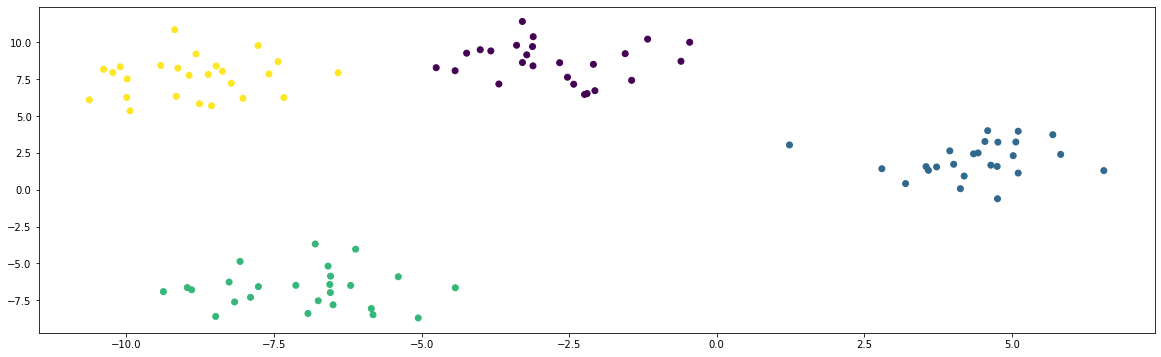

In [ ]:
# Dados base de dados - Make Blobs.

x, y = make_blobs(100, 2, centers=4, cluster_std=1.3, random_state=42)

plt.figure(figsize=(20, 6))
plt.scatter(x[:,0], x[:,1], c=y)

In [ ]:
# Implementação.
def euclidean_distance(a, b):
    return np.sqrt(np.sum((np.array(a) - np.array(b))**2, axis=1))

def gaussian_kernel(d, bandwidth):
    return np.exp(-0.5 * (d / bandwidth)**2) / (bandwidth * np.sqrt(2 * np.pi))

In [ ]:
class Mean_Shift():
    def __init__(self, bandwidth, radius=None):
        self.bandwidth = bandwidth
        self.radius = self.bandwidth if radius is None else radius
    
    def fit(self, x):
        centroids = np.array(x).copy()
        centroids_last = np.zeros(x.shape)
        
        while not np.allclose(centroids, centroids_last, rtol=1e-10, atol=1e-10):
            centroids_last = centroids.copy()
            
            for i, centroid in enumerate(centroids):
                distances = euclidean_distance(centroid, x)
                neighbours = x[distances <= self.radius]
                distances = distances[distances <= self.radius]
                
                weights = gaussian_kernel(distances, self.bandwidth).reshape(-1, 1)
                centroids[i] = np.sum(weights * neighbours, axis=0) / weights.sum()
                
        self.cluster_centers_ = np.unique(np.round(centroids, decimals=9), axis=0)
        
    def predict(self, x):
        pass

In [ ]:
# Realizando Testes no Ambiente com a base do Mean_shift
mean_shift = Mean_Shift(bandwidth=4, radius=4)
mean_shift.fit(x)

print(mean_shift.cluster_centers_)

[[-8.86465937  7.60324596]
 [-7.01743419 -6.75541713]
 [-2.88956922  8.6321642 ]
 [ 4.40408214  2.03718284]]


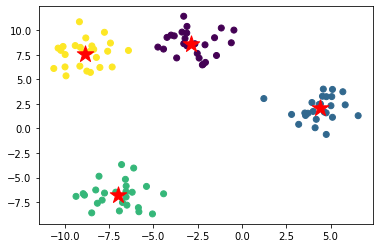

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(mean_shift.cluster_centers_[:, 0], mean_shift.cluster_centers_[:, 1], c='red', marker='*', s=300)

# **Comparação com o Scikit-learn**

In [ ]:
mean_shift_sk = MeanShift(bandwidth=4)
mean_shift_sk.fit(x)

print(mean_shift_sk.cluster_centers_)

[[-2.89568058  8.63436515]
 [ 4.38577929  2.03563702]
 [-7.00354281 -6.73010269]
 [-8.85949753  7.61545028]]


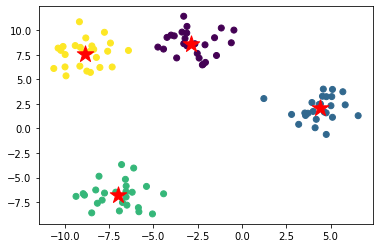

In [ ]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.scatter(mean_shift_sk.cluster_centers_[:, 0], mean_shift_sk.cluster_centers_[:, 1], c='red', marker='*', s=300)